In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import time

In [2]:
%load_ext autoreload
%autoreload 2
from marcia import Sampler,Likelihood

In [3]:
Samp = Sampler('LCDM',['H0','Omega_m'],['CC','BAO-alam'],[70,0.3],sampler_file='anto1.h5',resume=True)

In [4]:
Samp.get_burnin()

(58, 14)

In [5]:
Samp.get_chain(True).shape

(26000, 4)

Removed no burn in


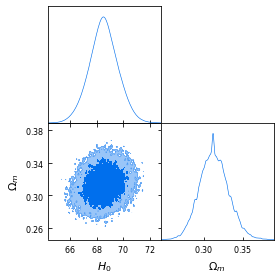

In [6]:
Samp.corner_plot(True)